<table><tbody><tr><th><p><img alt="Emblema" src="https://cdn6.aptoide.com/imgs/6/f/4/6f4821daa840da8fe971445350759fe5_icon.png" style="width:150px;"></p></th><th><p><strong>Inteligencia Artificial</strong></p><p><strong>Grado en Ingeniería Informática en Sistemas de Información – Curso 2024/2025</strong></p><p><strong>ENSEÑANZAS PRÁCTICAS Y DE DESARROLLO</strong></p><h1>EPD 5: Machine Learning - Clustering</h1></th></tr></tbody></table>

____

## Objetivos
- Implementación en Python de un algoritmo de clustering.

___

## Bibliografía Básica
- The elements of statistical learning: Data Mining, Inference and Prediction. Trevor Hastie, Robert Tibshirani, and Jerome Friedman. Springer, 2017. Disponible online en: https://web.stanford.edu/~hastie/ElemStatLearn

___

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

## Ejercicios
Implementar el algoritmo de clustering K-means para un dataset en 2D (fichero “ex7data2.mat”). Este algoritmo se basa en la idea de agrupar instancias similares en “clusters”. Se trata de un algoritmo iterativo que parte de unos centroides iniciales y los va refinando repetidamente agrupando las instancias en sus centroides más cercanos (EJ1) y recalculando los centroides (sus medias) en base a esas asignaciones (EJ2). Es importante tener en cuenta que las soluciones del K-means dependen de los centroides iniciales, es por eso que en la práctica en ocasiones se ejecuta el algoritmo varias veces con diferentes inicializaciones de los centroides y se selecciona la solución con el menor valor de la función objetivo que se está minimizando.

#### EJ01. 

Implementar la función findClosestCentroids para asignar cada instancia del conjunto de training a su centroide más cercano, partiendo de los siguientes centroides iniciales: [[3, 3], [6,2], [8, 5]], es decir, K se inicializa a 3. Se usará la distancia euclídea para determinar qué centroide está más cerca. La función debe devolver un array de m enteros (siendo m el número de instancias del dataset). Cada elemento de dicho array tendrá un valor de 0 a K-1 representando el centroide asociado (recuerde que en Python los índices empiezan en 0).

##### Solución:

In [2]:
# computes the centroid memberships for every example
# cluster = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids in cluster for a dataset X where each row is a single example. cluster = m x 1
# array of centroid assignments (i.e. each entry in range [1..K])
def findClosestCentroids(X, centroids):
    # Paso 1: Conseguir el valor de K. K=3
    K = centroids.shape[0] # = 3. si centroids.shape=>(3,2): 3 clusters y cada uno de ellos con 2 variables/columnas
    
    # You need to return the following variables correctly
    cluster = []
    # ====================== YOUR CODE HERE ======================
    # Instructions: Go over every example, find its closest centroid, and store
    #               the index inside "cluster".
    #               Concretely, cluster[i] should contain the index of the centroid
    #               closest to example i. Hence, it should be a value in the
    #               range 0..K
    for data in X: # CADA FILA DE X
        euc_dist = []
        for j in range(K): 
            euc_dist.append(np.sqrt(np.sum(np.abs(data - centroids[j])**2)))
        cluster.append(np.argmin(euc_dist)) 
    return np.asarray(cluster)
    

Shape de X:  (300, 2)


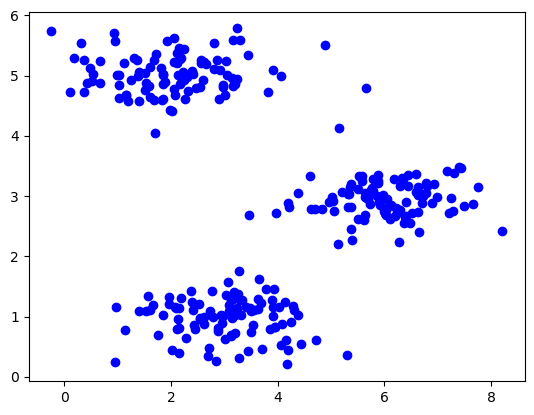

Finding closest centroids

Shape de idx:  (300,)
Closest centroids for the first 3 examples:  [0 2 1]


In [3]:
## ================= EJ1: Find Closest Centroids ====================
# To help you implement K-Means, we have divided the learning algorithm
# into two functions -- findClosestCentroids and computeCentroids. In this
# part, you should complete the code in the findClosestCentroids function.
#
# the closest centroids for the first 3 examples should be 0, 2, 1 respectively)
 
# Load an example dataset that we will be using
X = sio.loadmat("ex7data2.mat")['X']
print("Shape de X: ", X.shape)

# Graficar los datos
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], color="blue")
plt.show()

# Select an initial set of centroids
K = 3 #Establece el numero de clusters
initial_centroids = np.array([[3.0,3.0],[6.0,2.0],[8.0,5.0]]) #Definir los centroides iniciales

# Find the closest centroids for the examples using the initial_centroids
print("Finding closest centroids\n")
idx = findClosestCentroids(X, initial_centroids)
print("Shape de idx: ", idx.shape)
print("Closest centroids for the first 3 examples: ", idx[0:3])

#### EJ02.
Implementar la función computeCentroids para actualizar los centroides según la media de las instancias que fueron asignadas en el ejercicio anterior a cada centroide.

##### Solución:

In [4]:
# returs the new centroids by computing the means of the data points assigned to each centroid.
# centroids = computeCentroids(X, clusters, K) returns the new centroids by computing the means of the data points assigned to each centroid. 
# It is given a dataset X where each row is a single data point, a vector clusters of centroid assignments (i.e. each entry in range [1..K]) for each example, and K, 
# the number of centroids. You should return a matrix centroids, where each row of centroids is the mean of the data points assigned to it.
#
def computeCentroids(X, clusters, K):
    # You need to return the following variables correctly
    centroids = [] # Dimension: (3,2) --> 3 clusters cada uno con 2 filas

    # ====================== YOUR CODE HERE ======================
    # Instructions: Go over every centroid and compute mean of all points that
    #               belong to it. Concretely, the row vector centroids[i, :]
    #               should contain the mean of the data points assigned to
    #               centroid i.
    #
    # Note: You can use a for-loop over the centroids to compute this.
    #
    # PARA CADA CLUSTER
    for i in range(K):
        arr_aux = []
        for j in range(len(X)):
            if clusters[j] == i:
                arr_aux.append(X[j])
        if len(arr_aux) == 0: #Este if se ha añadido para solucionar el problema del metodo de Elbow, ya que daba error al no tener puntos asignados inicialmente
            # Si no hay puntos asignados, asigna un punto aleatorio del dataset
            centroids.append(X[np.random.randint(0, len(X))])
        else:
            # Calcula la media de los puntos asignados
            centroids.append(np.mean(arr_aux, axis=0))
        #centroids.append(np.mean(arr_aux, axis=0)) 
        
    return np.asarray(centroids) # Transformamos a array porque tenemos una lista en este momento


In [6]:
## ===================== EJ2: Compute Means =========================
# After implementing the closest centroids function, you should now
# complete the computeCentroids function.
# the centroids should be [ [2.428301 3.157924] [5.813503 2.633656] [7.119387 3.616684] ]

# Compute means based on the closest centroids found in the previous part
centroids = computeCentroids(X, idx, K)
print("Centroids computed after initial finding of closest centroids:\n", centroids)

Centroids computed after initial finding of closest centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


#### EJ03.
Implementar la función runKmeans donde se llama a las dos funciones anteriores para ver cómo funciona el algoritmo usando los centroides iniciales especificados en el EJ1 y 10 iteraciones. Visualizar e interpretar los resultados: centroides iniciales vs. Centroides finales.

##### Solución:

In [6]:
def plotClusters(X,clusters,centroids,ini_centroids):
    # Assigning specific color to each cluster. Assuming 3 for now
    cols={0:'b',1:'g',2:'coral',3:'c',4:'lime'}
    fig,ax=plt.subplots()

    # Plots every cluster points
    for i in range(len(clusters)):
        ax.scatter(X[i][0],X[i][1],color=cols[clusters[i]], marker="+")

    # Plots all the centroids and mark them with a circle around
    for j in range(len(centroids)):
        # Plot current centroids with circle
        ax.scatter(centroids[j][0],centroids[j][1],color=cols[j]) # PONE UN PUNTO PARA EL FINAL
        ax.add_artist(plt.Circle((centroids[j][0], centroids[j][1]), 0.4, linewidth=2, fill=False)) # ARTIST LE PONE UN CIRCULO
        # Plot initial centroids with ^ and circle in yellow
        ax.scatter(ini_centroids[j][0],ini_centroids[j][1],marker="^",s=150,color=cols[j]) # PONE UN ^ PARA EL INICIAL
        ax.add_artist(plt.Circle((ini_centroids[j][0], ini_centroids[j][1]), 0.4, linewidth=2, color='y', fill=False))

    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title("K-means Clustering")
    plt.show()

In [7]:
# runs the K-Means algorithm on data matrix X, where each row of X is a single example
# [centroids, idx] = runKmeans(X, initial_centroids, max_iters, ... plot_progress) runs the K-Means algorithm on data matrix X, where each row of X is a single example. 
# It uses initial_centroids used as the initial centroids. max_iters specifies the total number of interactions of K-Means to execute. plot_progress is a true/false flag that
# indicates if the function should also plot its progress as the learning happens. This is set to false by default. runkMeans returns centroids, 
# a Kxn matrix of the computed centroids and idx, a m x 1 vector of centroid assignments (i.e. each entry in range [1..K])
#

def runKmeans(X, initial_centroids, max_iters, plot=False):
    # Initialize values
    K = initial_centroids.shape[0] # 3
    centroids = initial_centroids
    idx = np.zeros((X.shape[0])) # Cada elemento tiene un id de un cluster asociado
    for i in range(max_iters):
        print("\tK-Means iteration: ",i, "/", max_iters)
        # For each example in X, assign it to the closest centroid
        # idx es array de índices de cluster de cada fila
        idx = findClosestCentroids(X, centroids)
        # Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)
    if plot==True:
        plotClusters(X, idx, centroids, initial_centroids)
    return centroids, idx
    

	K-Means iteration:  0 / 10
	K-Means iteration:  1 / 10
	K-Means iteration:  2 / 10
	K-Means iteration:  3 / 10
	K-Means iteration:  4 / 10
	K-Means iteration:  5 / 10
	K-Means iteration:  6 / 10
	K-Means iteration:  7 / 10
	K-Means iteration:  8 / 10
	K-Means iteration:  9 / 10


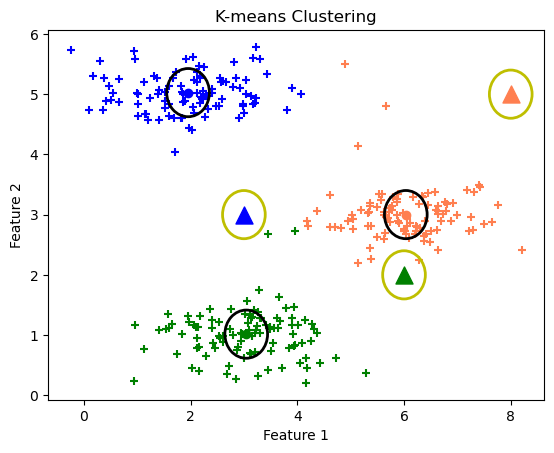

Centroids computed after  10  iterations of K-Means with manual initial centroids:
 [[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


In [8]:
## =================== EJ3: K-Means Clustering ======================
# After you have completed the two functions computeCentroids and
# findClosestCentroids, you have all the necessary pieces to run the
# kMeans algorithm. In this part, you will run the K-Means algorithm on
# the example dataset we have provided.
#
max_iters = 10
centroids, idx = runKmeans(X, initial_centroids, max_iters, plot=True)
print("Centroids computed after ", max_iters, " iterations of K-Means with manual initial centroids:\n", centroids)

#### EJ04.
Existen algoritmos que buscan la inicialización óptima de los centroides, como el K-Means++. En este caso, implemente una inicialización los centroides seleccionando al azar K instancias del conjunto de entrenamiento implementando la función kMeansInitCentroids. Se recomienda modificar aleatoriamente los datos usando randint de numpy y seleccionar las K instancias. Después volver a ejecutar el algoritmo completo y ver cómo varían los centroides encontrados.

##### Solución:

In [9]:
# This function initializes K centroids that are to be used in K-Means on the dataset X
# centroids = kMeansInitCentroids(X, K) returns K initial centroids to be used with the K-Means on the dataset X
#
def kMeansInitCentroids(X, K):
    # You should return this variable correctly
    centroids = []
    # ====================== YOUR CODE HERE =====================
    # Instructions: You should set centroids to randomly chosen examples from the dataset X
    #
    m, n = X.shape
    centroids = np.zeros((K, n)) 
    idx = np.random.randint(0, m, K) #Asignacion de los centroides de cada cluster a un registro del conjunto de datos seleccionado de forma aleatoria
    for i in range(K):
        centroids[i] = X[idx[i]] 

    return centroids

	K-Means iteration:  0 / 10
	K-Means iteration:  1 / 10
	K-Means iteration:  2 / 10
	K-Means iteration:  3 / 10
	K-Means iteration:  4 / 10
	K-Means iteration:  5 / 10
	K-Means iteration:  6 / 10
	K-Means iteration:  7 / 10
	K-Means iteration:  8 / 10
	K-Means iteration:  9 / 10


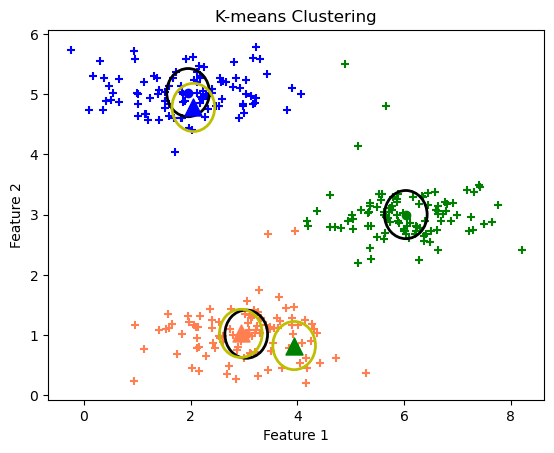

Centroids computed after  10  iterations of K-Means with random initial centroids:
 [[1.95399466 5.02557006]
 [6.03366736 3.00052511]
 [3.04367119 1.01541041]]


In [10]:
## =================== EJ4: Setting random initial centroids ======================
# Setting centroids to random examples of the training data
random_initial_centroids = kMeansInitCentroids(X, K)
max_iters= 10

centroids, idx = runKmeans(X, random_initial_centroids, max_iters, plot=True)
print("Centroids computed after ", max_iters, " iterations of K-Means with random initial centroids:\n", centroids)

#### EJ05.
Implementar el algoritmo elbow en la función elbowMethod para determinar cuál sería el K óptimo para este conjunto de datos. Pruebe con K desde 1 hasta 10. Visualice la gráfica función coste versus número de clusters.

##### Solución:

In [11]:
def elbowMethod(X):
    J1=[]
    m = X.shape[0]
    for k in range(1, 10): # Cada k
        random_initial_centroids = kMeansInitCentroids(X, k) #Inicializar centroides
        centroids, idx = runKmeans(X, random_initial_centroids, 10, plot=False) # Ejecutar kmeans
        suma1=0
        for i in range(X.shape[0]): 
            print(k, " -- ", i)
            suma1 += np.sqrt(np.sum(np.abs(X[i] - centroids[int(idx[i])]) ** 2)) # distancia euclidea
        J1.append(suma1/m) #Se añade la media del coste

    plt.plot(range(2, 11), J1, c="blue")
    plt.title("The elbow method")
    plt.xlabel("K: Number of clusters")
    plt.ylabel("J: Cost function")
    plt.show()

	K-Means iteration:  0 / 10
	K-Means iteration:  1 / 10
	K-Means iteration:  2 / 10
	K-Means iteration:  3 / 10
	K-Means iteration:  4 / 10
	K-Means iteration:  5 / 10
	K-Means iteration:  6 / 10
	K-Means iteration:  7 / 10
	K-Means iteration:  8 / 10
	K-Means iteration:  9 / 10
1  --  0
1  --  1
1  --  2
1  --  3
1  --  4
1  --  5
1  --  6
1  --  7
1  --  8
1  --  9
1  --  10
1  --  11
1  --  12
1  --  13
1  --  14
1  --  15
1  --  16
1  --  17
1  --  18
1  --  19
1  --  20
1  --  21
1  --  22
1  --  23
1  --  24
1  --  25
1  --  26
1  --  27
1  --  28
1  --  29
1  --  30
1  --  31
1  --  32
1  --  33
1  --  34
1  --  35
1  --  36
1  --  37
1  --  38
1  --  39
1  --  40
1  --  41
1  --  42
1  --  43
1  --  44
1  --  45
1  --  46
1  --  47
1  --  48
1  --  49
1  --  50
1  --  51
1  --  52
1  --  53
1  --  54
1  --  55
1  --  56
1  --  57
1  --  58
1  --  59
1  --  60
1  --  61
1  --  62
1  --  63
1  --  64
1  --  65
1  --  66
1  --  67
1  --  68
1  --  69
1  --  70
1  --  71
1  --  72


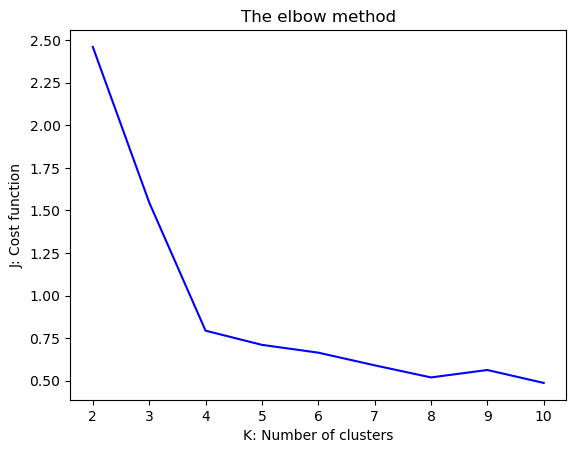

In [12]:
## =================== EJ5: Elbow Method ======================
elbowMethod(X)